<a href="https://colab.research.google.com/github/taha-koroglu/gumushane_eem_eesec440/blob/main/code/xor_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En başta bu kodda kullanacağımız **fonksiyonları** çağıracağımız **kütüphaneleri** dahil ediyoruz. 

First we import the **libraries** to use the functions that we are going to invoke in this code.

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np # numerical python kütüphanesi
import pandas as pd
import sys

Bildiğimiz gibi, *XOR* problemi *Elektrik-Elektronik Mühendisliğinde* sayısal devreler (logic circuits) alanında karşımıza çıkan bir problem. **İki girişli ve tek çıkışlı** bir sistemin girişleri *TRUE-FALSE* (veya *1-0* veya *HIGH-LOW*) olarak isimlendirilen *Boolean* veri tipinde değer alıyorlar. Benzer şekilde çıkış da yine *1-0* Boolean değişkenlerinden birisi oluyor.

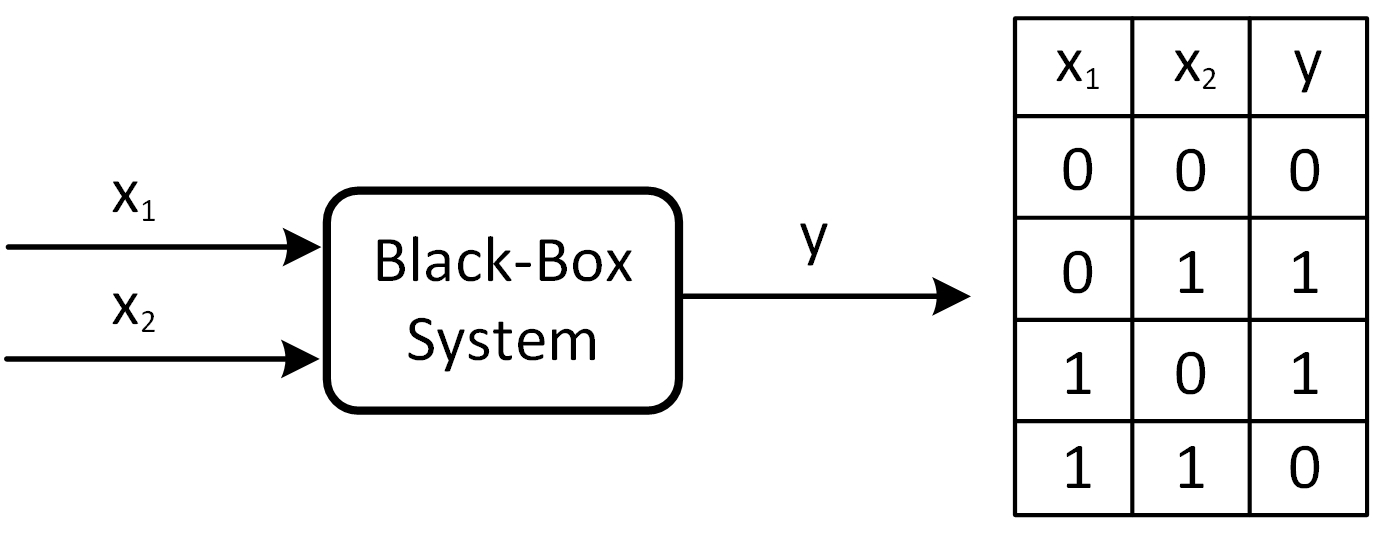

Aşağıda **numpy** kütüphanesi kullanarak *giriş* ve *hedef verisini* (**input and target data**) oluşturduk. Dikkat edin, burada hedef verisine İngilizce'de **annonation** deniyor. Yani bizler hedef değişkenini oluşturduğumuzda giriş verisini **annotate** etmiş oluyoruz.

In [2]:
trainingData = np.array([[0,0], [0,1], [1,0], [1,1]], "float32")
targetData = np.array([[0], [1], [1], [0]], "float32")

Yukarıda ürettiğimiz giriş-çıkış verisini aşağıda konsola yazdıralım.

Let's print the input-output data we generated above to the console.

In [3]:
print(trainingData)
print(targetData)

[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
[[0.]
 [1.]
 [1.]
 [0.]]


**TF** kütüphanesinin içerisinde yer alan **Keras** kütüphanesiyle bir tane çok katmanlı sinir ağı (**multi-layer perceptron** - **MLP**) oluşturalım. Giriş sayısının iki, çıkış sayısının bir olduğunu, gizli katman (hidden layer) sayısını ve bu katmanlardaki nöron sayısını ve de hangi aktivasyon fonksiyonunu kullandığımızı adım adım seçeceğiz.

In [7]:
model = tf.keras.models.Sequential(layers=None, name='xor_MLP')
model.add(tf.keras.layers.Dense(10, input_dim = 2, activation = 'relu', name='HL1'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid', name='outputLayer'))

Yukarıdaki kodda yapay sinir ağımızın yapısını (i.e., katman sayısı, katmanlardaki nöron sayısı, nöron çıkışlarında kullanılan aktivasyon fonskiyon tipleri) belirledik. Bir sonraki adım olarak öğrenme (**learning**) işlemini başlatacağız. Şimdi öğrenme işleminin nasıl olacağını belirleyelim.

In [8]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics='binary_accuracy')
model.summary()

Model: "xor_MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
HL1 (Dense)                  (None, 10)                30        
_________________________________________________________________
outputLayer (Dense)          (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


Son olarak konfigürasyonunu tamamladığımız çok katmanlı yapay sinir ağının eğitimini başlatıyoruz.

In [9]:
history=model.fit(trainingData, targetData, epochs=200, verbose=1)

Epoch 1/200
1/1 [==============================] - 0s 350ms/step - loss: 0.2371 - binary_accuracy: 0.7500
Epoch 2/200
1/1 [==============================] - 0s 8ms/step - loss: 0.2368 - binary_accuracy: 0.5000
Epoch 3/200
1/1 [==============================] - 0s 6ms/step - loss: 0.2365 - binary_accuracy: 0.5000
Epoch 4/200
1/1 [==============================] - 0s 6ms/step - loss: 0.2362 - binary_accuracy: 0.5000
Epoch 5/200
1/1 [==============================] - 0s 8ms/step - loss: 0.2359 - binary_accuracy: 0.5000
Epoch 6/200
1/1 [==============================] - 0s 5ms/step - loss: 0.2356 - binary_accuracy: 0.5000
Epoch 7/200
1/1 [==============================] - 0s 8ms/step - loss: 0.2353 - binary_accuracy: 0.5000
Epoch 8/200
1/1 [==============================] - 0s 5ms/step - loss: 0.2350 - binary_accuracy: 0.5000
Epoch 9/200
1/1 [==============================] - 0s 5ms/step - loss: 0.2348 - binary_accuracy: 0.5000
Epoch 10/200
1/1 [==============================] - 0s 10ms/st

In [10]:
model.predict(trainingData).round()

array([[0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

Text(0.5, 1.0, 'loss')

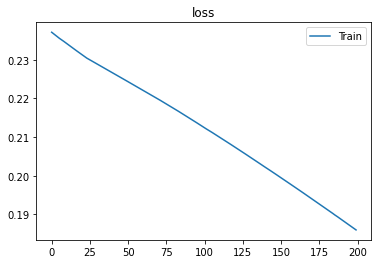

In [11]:
lossCurve = history.history["loss"]
plt.plot(lossCurve, label="Train")
plt.legend(loc='upper right')
plt.title("loss")

Text(0.5, 1.0, 'Accuracy vs. epoch')

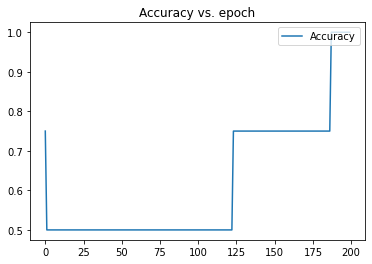

In [12]:
accuracyCurve = history.history["binary_accuracy"]
plt.plot(accuracyCurve, label="Accuracy")
plt.legend(loc='upper right')
plt.title("Accuracy vs. epoch")